### Slade Brooks
##### brooksl@mail.uc.edu
##### 03.10.2023
# AeroComputing Assignment 6

This code does a thing

In [95]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Use symbolab to find derivatives:

$$
\text{v}(M) = \sqrt{\frac{\gamma +1}{\gamma -1}} \tan^{-1}{(\sqrt{\frac{\gamma -1}{\gamma +1}(M^2-1)})} - \tan^{-1}{(\sqrt{M^2-1})}
$$

$$
\dot{\text{v}}(M) = \frac{2\sqrt{M^2-1}}{\gamma M^3 - M^3 + 2M}
$$

$$
\ddot{\text{v}}(M) = \frac{2(-2\gamma M^4 + 2M^4 + 3\gamma M^2 - 3M^2 + 2)}{M^2(\gamma M^2 - M^2 +2)^2\sqrt{M^2-1}}
$$

# Part 2

In [96]:
# set up sympy
M, y = sp.symbols("M, y")
pran = (sp.sqrt((y+1)/(y-1)))*sp.atan(sp.sqrt((y-1)/(y+1)*(sp.Pow(M, 2) - 1))) - sp.atan(sp.sqrt(sp.Pow(M, 2) - 1))
prandot = sp.diff(pran, M)
pranddot = sp.diff(prandot, M)

In [97]:
# set up nums to loop through
gam = 1.4
Ms = np.linspace(1, 5, 30)
deltaM = 0.01

In [98]:
# find real derivs
prandotreal = np.empty(len(Ms))
pranddotreal = np.empty(len(Ms))

for i in range(0, len(Ms)):
    prandotreal[i] = prandot.subs([(M, Ms[i]), (y, gam)])
    pranddotreal[i] = pranddot.subs([(M, Ms[i]), (y, gam)])

## Part A

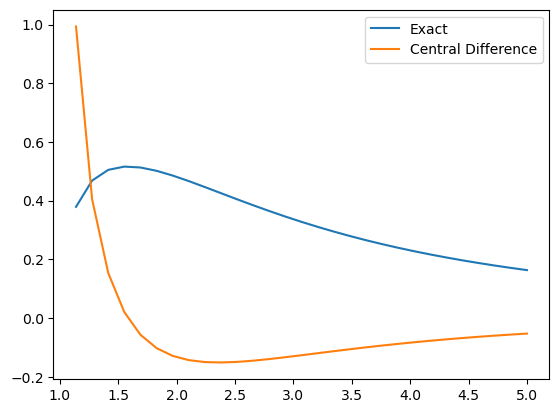

In [100]:
# central diff 1st deriv
def centdif1(f, M, dM, y):
    return (f.subs([(M, (M + dM)), (y, gam)]) - f.subs([(M, (M - dM)), (y, gam)]))/(2*dM)

# make list of results
prandotCD = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    big = prandot.subs([(M, (Ms[i] + deltaM)), (y, gam)])
    small = prandot.subs([(M, (Ms[i] - deltaM)), (y, gam)])
    if type(big) and type(small) != sp.core.mul.Mul:
        prandotCD[i] = (big - small)/(2*deltaM)

# plot it
plt.plot(Ms, prandotreal, label="Exact")
plt.plot(Ms, prandotCD, label="Central Difference")
plt.legend()
plt.show()

In [ ]:
# central diff 2nd deriv

## Part B

In [ ]:
# 1st order forward 1st deriv

In [ ]:
# 1st order forward 2nd deriv

## Part C

In [ ]:
# 2nd order forward 1st deriv

In [ ]:
# 2nd order forward 1st deriv